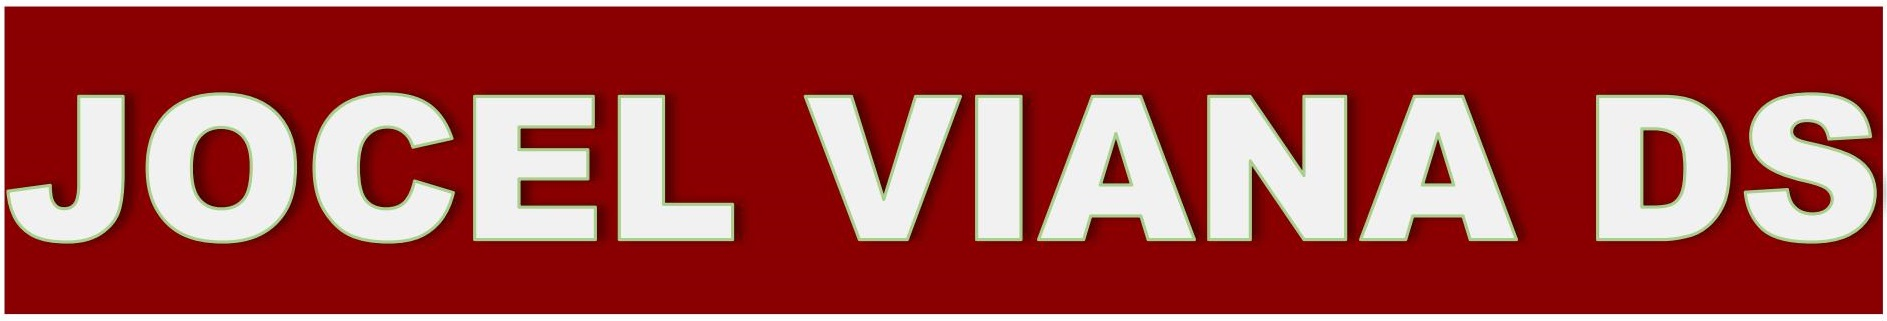

# **Prenvendo o preço de passagens aéreas**

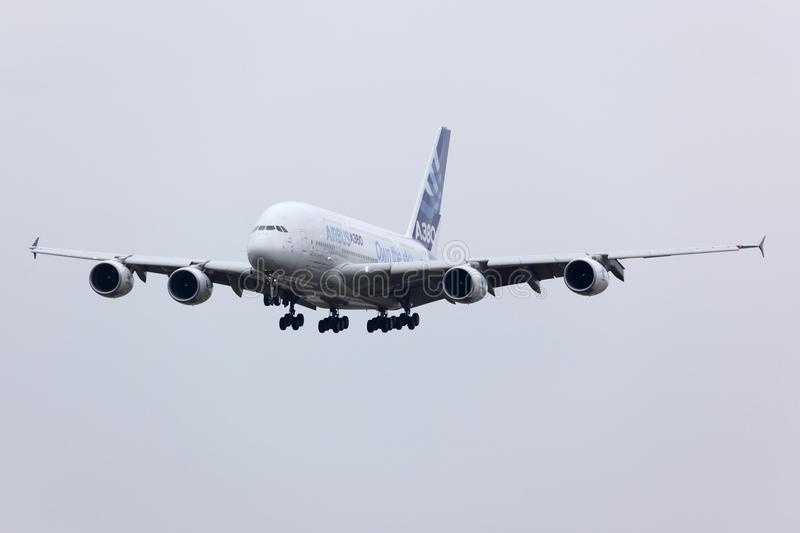

**Fonte:**[link](https://thumbs.dreamstime.com/b/aterrissagem-civil-moderna-do-avi%C3%A3o-de-passageiros-airbus-industrie-f-wwdd-ap%C3%B3s-um-voo-programa-demonstrativo-em-zhukovsky-102726682.jpg)



## Problema de negócio

### **Previsão de preço dos vôos usando Machine Learning**
Simulação:
Eu, como cientista de dados da empresa **ABC Vôos LTDA**, fui contratado para desenvolver uma máquina preditiva que prever o preço das passagens aéreas da empresa.

Para isso,  será feito as seguintes atividades:


*   Analisar um conjunto de dados de tarifas de vôos, usando técnicas de processamento de dados,
*   Fazer algumas previsões sobre o preço do vôo, com base em alguns alguns critérios (tipo da companhia, horário da partida, chegada, duração do vôo, origem, destino, etc. 



## Obtenção dos dados

Os dados para a realização desse trabalho foram retirados de uma competição do Kaggle.

**Fonte:** [link](https://www.kaggle.com/datasets/absin7/airlines-fare-prediction?select=Test_set.xlsx)




## Conjunto de dados





*   **Airline:** Tipo da companhia aérea;
*   **Date_of_journey:** Data da viagem;
*   **Source:** Nome do local onde se iniciará a viagem;
*   **Destination:** Destino da viagem;
*   **Route:** Rota da viagem;
*   **Arrival_Time:** Hora da chegada ao destino;
*   **Duration:** Tempo que se estende toda a jornada da viagem;
*   **Total_Stops:** Total de paradas durante a viagem;
*   **Additional_Info:** Informações sobre comidas e outras comodidades;
*   **Price:** Preço do vôo para a viagem completa.













In [ ]:
# Importação dos pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV # 3 importações
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Importação da base de dados
df_train = pd.read_excel('Data_Train.xlsx')

# Visualizar os 10 primeiros registros
df_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
# Tamanho do dataset
df_train.shape

(10683, 11)

In [ ]:
# Verificar o tipo das colunas
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
# Mais informações sobre o conjunto de dados 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Infromações estatísticas das variáveis numéricas (price)
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# Verificar a existência de valores nulos
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Eliminar valores Missing
df_train.dropna(inplace=True)

In [ ]:
# Verificar novamente
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Verificar valores duplicados
df_train[df_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [ ]:
# Eliminar valores duplicados mantendo o 1º registro
df_train.drop_duplicates(keep='first', inplace=True)

# Verificar valores duplicados novamente
df_train[df_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [ ]:
# Tabela de frequência da coluna "Additional_Info"
df_train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
# Valores únicos para a coluna "Airline"
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
# Tabela de frequência da coluna "Airline"
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# Checar rotas das companhias
df_train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

***A partir de agora vou utilizar o outro dataset para testar na máquina preditiva. O primeiro dataset será utilizado para treinar a máquina que vai ser construída a partir de agora.***

In [ ]:
# Importando a 2ª base de dados
df_test = pd.read_excel('Test_set.xlsx')

# Primeiras linhas
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
# Dimensões
df_test.shape

(2671, 10)

In [ ]:
# Informações do dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


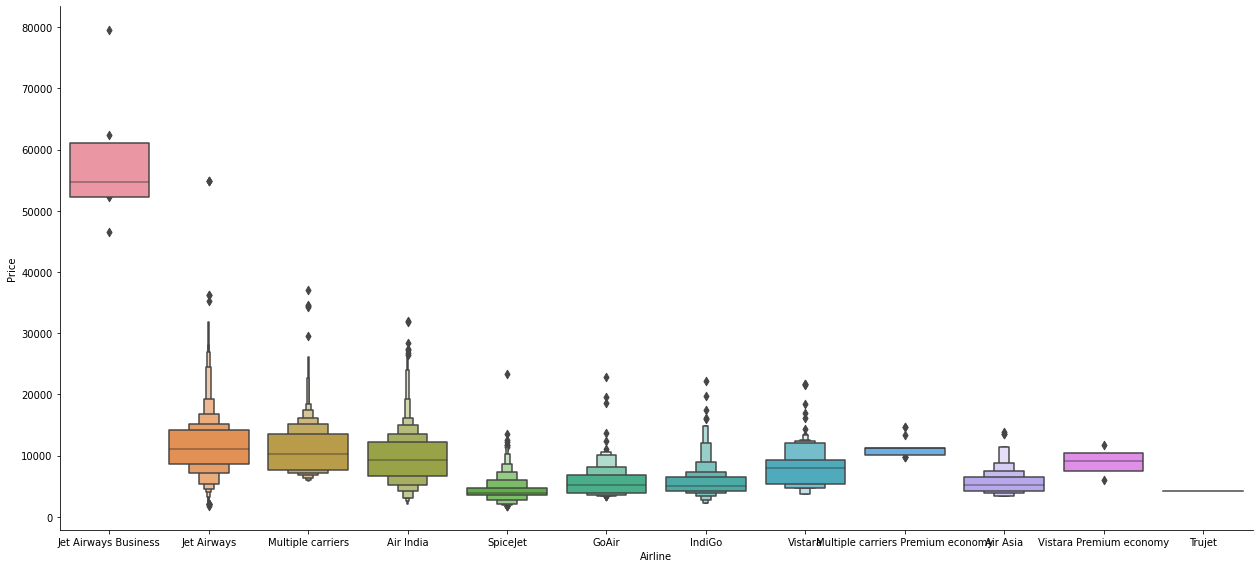

In [ ]:
# Plotando preço vs Companhia aérea
sns.catplot(y ='Price', x ='Airline', data = df_train.sort_values('Price', ascending=False), kind='boxen', height=8, aspect=2.2)
plt.tight_layout();

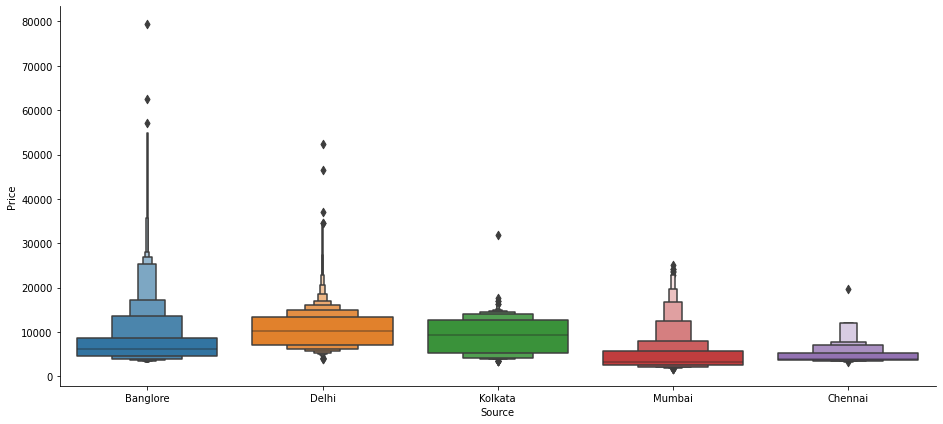

In [ ]:
# Plotando preço vs origem do vôo
sns.catplot(y ='Price', x ='Source', data = df_train.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=2.2)
plt.tight_layout();

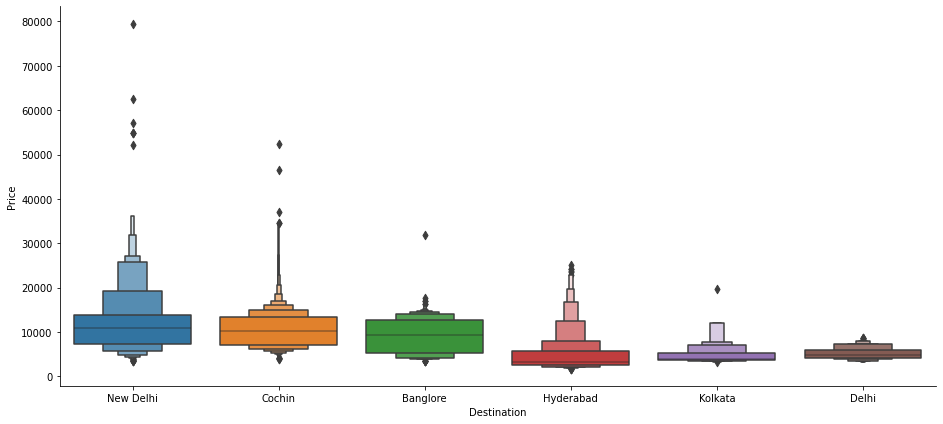

In [ ]:
# Plotando preço vs destino do vôo
sns.catplot(y ='Price', x ='Destination', data = df_train.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=2.2)
plt.tight_layout();

## Pré-processamento dos dados

### Nesse momento vou transformar todas as variáveis object das duas bases de dados em numéricas.

In [ ]:
# Converter a variável Duration em horas e minutos
df_train['Duration'] = df_train['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
df_test['Duration'] = df_test['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [ ]:
# Visualizar a conversão
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [ ]:
# Variável Date_of_Journey
df_train['Journey_day'] = df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train['Journey_month'] = df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train.drop(['Date_of_Journey'], axis=1, inplace=True)

In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [ ]:
# Variável Dep_Time
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.drop(['Dep_Time'], axis=1, inplace=True)

In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50


In [ ]:
# Variável Arrival_Time
df_train['Arrival_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_min'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train.drop(['Arrival_Time'], axis=1, inplace=True)

In [ ]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


### Agora vou fazer as alterações no dataset de teste

In [ ]:
# Variável Date_of_Journey
df_test['Journey_day'] = df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test['Journey_month'] = df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test.drop(['Date_of_Journey'], axis=1, inplace=True)

In [ ]:
# Variável Dep_Time
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop(['Dep_Time'], axis=1, inplace=True)

In [ ]:
# Variável Arrival_Time
df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop(['Arrival_Time'], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Journey_day      10462 non-null  int64 
 9   Journey_month    10462 non-null  int64 
 10  Dep_hour         10462 non-null  int64 
 11  Dep_min          10462 non-null  int64 
 12  Arrival_hour     10462 non-null  int64 
 13  Arrival_min      10462 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


In [ ]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


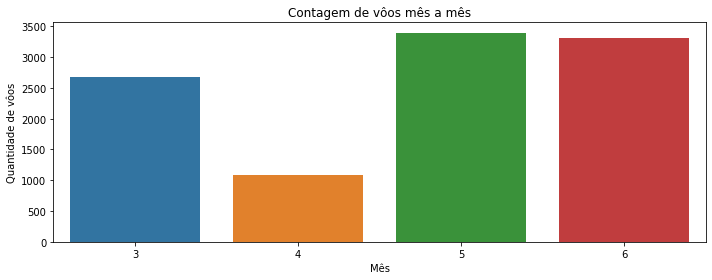

In [ ]:
# Plotando o gráfico de barras do mês (Duration) vs número de vôos
plt.figure(figsize=(10, 4))
plt.title('Contagem de vôos mês a mês')
ax=sns.countplot(x = 'Journey_month', data = df_train)
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.tight_layout();

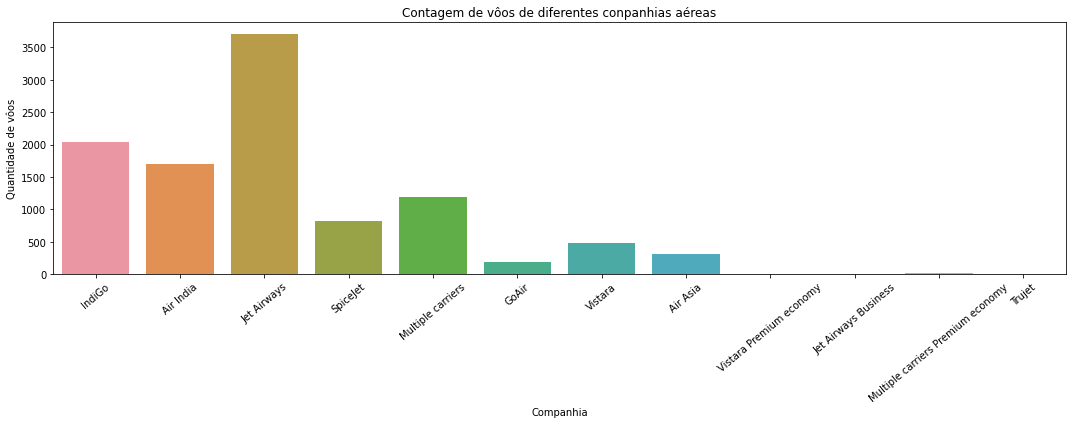

In [ ]:
# Plotando o gráfico de barras do tipo de companhia vs número de vôos
plt.figure(figsize=(15, 6))
plt.title('Contagem de vôos de diferentes conpanhias aéreas')
ax=sns.countplot(x = 'Airline', data = df_train)
plt.xlabel('Companhia')
plt.ylabel('Quantidade de vôos')
plt.xticks(rotation = 40)
plt.tight_layout();

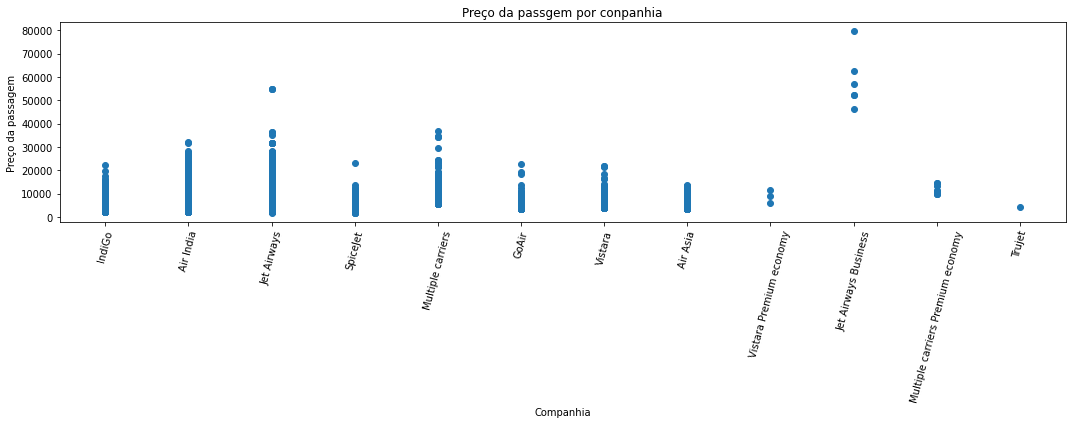

In [ ]:
# Plotando o preço vs tipo de companhia 
plt.figure(figsize=(15, 6))
plt.title('Preço da passgem por conpanhia')
plt.scatter(df_train['Airline'], df_train['Price'])
plt.xlabel('Companhia')
plt.ylabel('Preço da passagem')
plt.xticks(rotation=75)
plt.tight_layout();

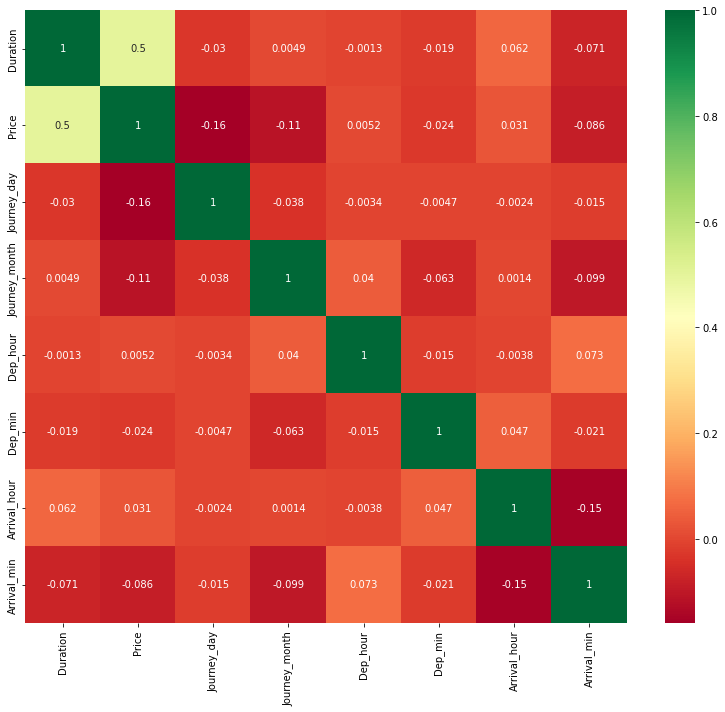

In [ ]:
# Plotando a correlação entre as variáveis
plt.figure(figsize=(11, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'RdYlGn')
plt.tight_layout(); 

In [ ]:
# Excluir o preço da base de dados
dados = df_train.drop(['Price'], axis = 1)

In [ ]:
# Dados categóricos e dados numéricos
dados_categoricos_treino = dados.select_dtypes(exclude=['int64', 'float', 'int32'])
dados_numericos_treino = dados.select_dtypes(include=['int64', 'float', 'int32'])

# Base de teste
dados_categoricos_teste = df_test.select_dtypes(exclude=['int64', 'float', 'int32', 'int32'])
dados_numericos_teste = df_test.select_dtypes(include=['int64', 'float', 'int32'])

In [ ]:
dados_numericos_teste.head()

,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,655,6,6,17,30,4,25
1,240,12,5,6,20,10,20
2,1425,21,5,19,15,19,0
3,780,21,5,8,0,21,0
4,170,24,6,23,55,2,45


In [ ]:
# Usando Label Encoder para colunas categóricas
lbe = LabelEncoder()
dados_categoricos_treino = dados_categoricos_treino.apply(LabelEncoder().fit_transform)
dados_categoricos_teste = dados_categoricos_teste.apply(LabelEncoder().fit_transform)

In [ ]:
dados_categoricos_teste.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,4,2,1,76,0,5
1,3,3,0,65,0,5
2,4,2,1,76,0,3
3,6,2,1,76,0,5
4,0,0,2,16,4,5


In [ ]:
# Concatenação de dados categóricos com numéricos
X = pd.concat([dados_categoricos_treino, dados_numericos_treino], axis = 1)
y = df_train['Price']
z = pd.concat([dados_categoricos_teste, dados_numericos_teste], axis = 1)



In [ ]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [ ]:
z.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,0,5,655,6,6,17,30,4,25
1,3,3,0,65,0,5,240,12,5,6,20,10,20
2,4,2,1,76,0,3,1425,21,5,19,15,19,0
3,6,2,1,76,0,5,780,21,5,8,0,21,0
4,0,0,2,16,4,5,170,24,6,23,55,2,45


In [ ]:
# Calcular a média percentual de error 'mape'
def media_absoluta_percentual(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Separar os dados de treino e teste para a máquina preditiva
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) 

## Construção da Máquina Preditiva

**Para construir essa máquina preditiva, vou usar validação cruzada que é uma técnica para avaliar modelos de ML por meio de treinamento de vários modelos de ML em subconjuntos de dados de entrada disponíveis e avaliação deles no subconjunto complementar dos dados. Usamos a validação cruzada para detectar sobreajuste, ou seja, a não generalização de um padrão. Segue um exemplo de validação abaixo:**

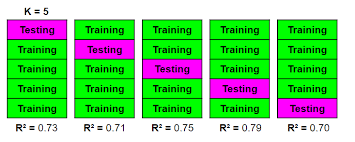

In [ ]:
# Realizando GridSearchCV na Decision Tree Regression
depth = list(range(1,11)) # Profundidade da árvore
param_grid = dict(max_depth = depth)

In [ ]:
# Lista o grid de parâmetro
param_grid

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
# Listar os hiperparâmetros da Máquina Preditiva
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
# Previsão de treino e resultado de teste
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_teste)

In [ ]:
# Melhor valor do hiperparâmetro da lista de 1 a 10 (max_depth)
tree.best_params_

{'max_depth': 10}

## Avaliação da Máquina Preditiva

### Avaliação com dados de treino

In [ ]:
# Impressão da informações (Métricas)
print(f'Erro quadrático médio: {sqrt(mse(y_train.values, y_train_pred))}')
print(f'Média absoluta de erro: {round(media_absoluta_percentual(y_train.values, y_train_pred))}')
print(f'R_quadrado: {r2_score(y_train.values, y_train_pred)}')

Erro quadrático médio: 1302.709727360351
Média absoluta de erro: 10
R_quadrado: 0.9193244432696516


### Avaliação com dados de teste

In [ ]:
# Impressão da informações (Métricas)
print(f'Erro quadrático médio: {sqrt(mse(y_test.values, y_test_pred))}')
print(f'Média absoluta de erro: {round(media_absoluta_percentual(y_test.values, y_test_pred))}')
print(f'R_quadrado: {r2_score(y_test.values, y_test_pred)}')

Erro quadrático médio: 2011.4368457745284
Média absoluta de erro: 12
R_quadrado: 0.8177772683920596


## Conclusão

**A máquina preditiva foi criada com 81% de acertividade. A próxima etapa seria repassar a MP para a equipe de desenvolvimento desenvolver a interface, front end e back end da aplicação.**